In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [9]:
import seaborn as sns

In [10]:
from wordcloud import WordCloud

In [11]:
from collections import Counter

In [12]:
from sklearn.linear_model import LogisticRegression 

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
import xgboost as xgb

In [15]:
import nltk

In [16]:
from nltk.corpus import stopwords

In [17]:
import string

In [18]:
from nltk.stem import PorterStemmer

In [19]:
df=pd.read_csv("Emotion_classify_Data.csv")


In [20]:
df

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [22]:
df.describe(include="all")

,Comment,Emotion
count,5937,5937
unique,5934,3
top,i feel like a tortured artist when i talk to her,anger
freq,2,2000


In [23]:
df.columns

Index(['Comment', 'Emotion'], dtype='object')

In [24]:
df.shape

(5937, 2)

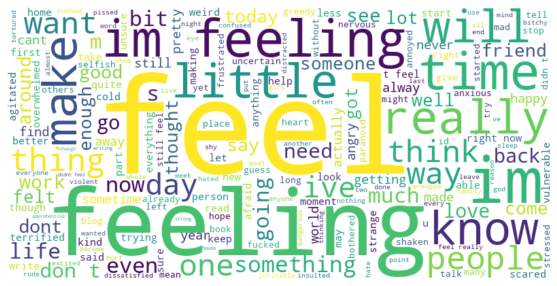

In [25]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Comment']))

# Show the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Preprocessing

1. Lowercase
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. stemming

In [27]:
ps=PorterStemmer()

In [28]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [29]:
df['Comment']=df['Comment'].apply(transform_text)

In [30]:
df

,Comment,Emotion
0,serious hate one subject death feel reluct drop,fear
1,im full life feel appal,anger
2,sit write start dig feel think afraid accept p...,fear
3,ive realli angri r feel like idiot trust first...,joy
4,feel suspici one outsid like raptur happen someth,fear
...,...,...
5932,begun feel distress,fear
5933,left feel annoy angri think center stupid joke,anger
5934,ever get marri everyth readi offer got togeth ...,joy
5935,feel reluct appli want abl find compani know l...,fear


In [31]:
word_freq = Counter(' '.join(df['Comment']).split())


In [32]:
word_freq

Counter({'serious': 19,
         'hate': 136,
         'one': 228,
         'subject': 9,
         'death': 11,
         'feel': 6233,
         'reluct': 60,
         'drop': 11,
         'im': 943,
         'full': 26,
         'life': 180,
         'appal': 10,
         'sit': 51,
         'write': 116,
         'start': 180,
         'dig': 4,
         'think': 274,
         'afraid': 77,
         'accept': 55,
         'possibl': 38,
         'might': 57,
         'make': 343,
         'ive': 199,
         'realli': 323,
         'angri': 92,
         'r': 6,
         'like': 1013,
         'idiot': 7,
         'trust': 44,
         'first': 77,
         'place': 64,
         'suspici': 30,
         'outsid': 18,
         'raptur': 1,
         'happen': 67,
         'someth': 194,
         'jealou': 50,
         'becasu': 1,
         'want': 358,
         'kind': 82,
         'love': 193,
         'true': 16,
         'connect': 17,
         'two': 52,
         'soul': 11,
        

In [33]:
word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['count']).reset_index()


In [34]:
word_freq_df = word_freq_df.rename(columns={'index': 'word'})


In [35]:
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)


In [36]:
word_freq_df

,word,count
5,feel,6233
26,like,1013
8,im,943
178,get,402
159,time,360
...,...,...
3744,sword,1
37,becasu,1
3747,linger,1
3749,da,1


<AxesSubplot:xlabel='word', ylabel='count'>

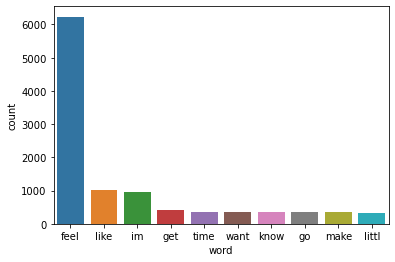

In [37]:
sns.barplot(x=word_freq_df['word'][:10],y=word_freq_df['count'][:10])

In [38]:
le=LabelEncoder()


In [39]:
df['Emotion']=le.fit_transform(df['Emotion'])



In [40]:
df

,Comment,Emotion
0,serious hate one subject death feel reluct drop,1
1,im full life feel appal,0
2,sit write start dig feel think afraid accept p...,1
3,ive realli angri r feel like idiot trust first...,2
4,feel suspici one outsid like raptur happen someth,1
...,...,...
5932,begun feel distress,1
5933,left feel annoy angri think center stupid joke,0
5934,ever get marri everyth readi offer got togeth ...,2
5935,feel reluct appli want abl find compani know l...,1


In [41]:
X=df['Comment']

In [42]:
y=df['Emotion']

In [43]:
X

0         serious hate one subject death feel reluct drop
1                                 im full life feel appal
2       sit write start dig feel think afraid accept p...
3       ive realli angri r feel like idiot trust first...
4       feel suspici one outsid like raptur happen someth
                              ...                        
5932                                  begun feel distress
5933       left feel annoy angri think center stupid joke
5934    ever get marri everyth readi offer got togeth ...
5935    feel reluct appli want abl find compani know l...
5936                want apolog feel like heartless bitch
Name: Comment, Length: 5937, dtype: object

In [44]:
y

0       1
1       0
2       1
3       2
4       1
       ..
5932    1
5933    0
5934    2
5935    1
5936    0
Name: Emotion, Length: 5937, dtype: int32

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [46]:
tdidf_Vectorizer=TfidfVectorizer(max_features=30000)


In [47]:
tdidf_Vectorizer

TfidfVectorizer(max_features=30000)

In [48]:
# Fiting and transforming the training data


In [49]:
X_train_tfidf=tdidf_Vectorizer.fit_transform(X_train)

In [50]:
X_train_tfidf

<3977x5064 sparse matrix of type '<class 'numpy.float64'>'
	with 35710 stored elements in Compressed Sparse Row format>

In [51]:
# Transforming the testing data


In [52]:
X_test_tfidf=tdidf_Vectorizer.transform(X_test)

In [53]:
X_test_tfidf

<1960x5064 sparse matrix of type '<class 'numpy.float64'>'
	with 16330 stored elements in Compressed Sparse Row format>

# RandomForestClassifier

In [54]:
rfc=RandomForestClassifier()


In [55]:
rfc.fit(X_train_tfidf,y_train)

RandomForestClassifier()

In [56]:
y_pred=rfc.predict(X_train_tfidf)


In [57]:
accuracy_score(y_train,y_pred)

0.9992456625597184

In [58]:
y_pred=rfc.predict(X_test_tfidf)


In [59]:
accuracy_score(y_test,y_pred)

0.9408163265306122

In [60]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

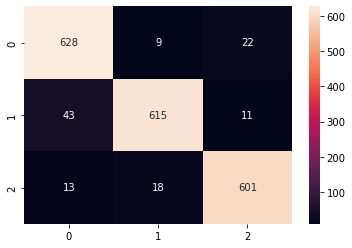

In [61]:
sns.heatmap(data=cm,fmt='d',annot=True)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       659
           1       0.96      0.92      0.94       669
           2       0.95      0.95      0.95       632

    accuracy                           0.94      1960
   macro avg       0.94      0.94      0.94      1960
weighted avg       0.94      0.94      0.94      1960



In [63]:
def predict_emotion(ele):
    ele=[ele]
    input_tfidf=tdidf_Vectorizer.transform(ele)
    predicted_label=rfc.predict(input_tfidf)
    predicted_emotion=le.inverse_transform(predicted_label)
    return predicted_emotion

In [64]:
user_input=input("Enter a comment")


Enter a commentthis is bad 


In [65]:
emotion=predict_emotion(user_input)


In [66]:
print(emotion)

['anger']


# LogisticRegression

In [67]:
lr=LogisticRegression()



In [68]:
lr.fit(X_train_tfidf,y_train)

LogisticRegression()

In [69]:
y_pred=lr.predict(X_train_tfidf)


In [70]:
accuracy_score(y_train,y_pred)

0.9798843349258235

In [71]:
y_pred=lr.predict(X_test_tfidf)


In [72]:
accuracy_score(y_test,y_pred)

0.9198979591836735

In [73]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

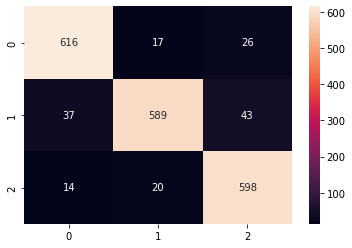

In [74]:
sns.heatmap(data=cm,fmt='d',annot=True)

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       659
           1       0.94      0.88      0.91       669
           2       0.90      0.95      0.92       632

    accuracy                           0.92      1960
   macro avg       0.92      0.92      0.92      1960
weighted avg       0.92      0.92      0.92      1960



In [76]:
def predict_emotion(ele):
    ele=[ele]
    input_tfidf=tdidf_Vectorizer.transform(ele)
    predicted_label=lr.predict(input_tfidf)
    predicted_emotion=le.inverse_transform(predicted_label)
    return predicted_emotion

In [77]:
user_input=input("Enter a comment")


Enter a commentthis is a good movie 


In [78]:
emotion=predict_emotion(user_input)


In [79]:
print(emotion)

['joy']


# KNeighborsClassifier

In [80]:
knc=KNeighborsClassifier()


In [81]:
knc.fit(X_train_tfidf,y_train)

KNeighborsClassifier()

In [82]:
y_pred=knc.predict(X_train_tfidf)


In [83]:
accuracy_score(y_train,y_pred)

0.8780487804878049

In [84]:
y_pred=knc.predict(X_test_tfidf)


In [85]:
accuracy_score(y_test,y_pred)

0.7806122448979592

In [86]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

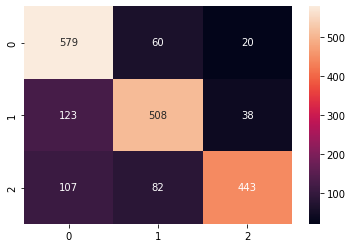

In [87]:
sns.heatmap(data=cm,fmt='d',annot=True)

In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       659
           1       0.78      0.76      0.77       669
           2       0.88      0.70      0.78       632

    accuracy                           0.78      1960
   macro avg       0.79      0.78      0.78      1960
weighted avg       0.79      0.78      0.78      1960



In [89]:
def predict_emotion(ele):
    ele=[ele]
    input_tfidf=tdidf_Vectorizer.transform(ele)
    predicted_label=knc.predict(input_tfidf)
    predicted_emotion=le.inverse_transform(predicted_label)
    return predicted_emotion

In [90]:
user_input=input("Enter a comment")


Enter a commenti will not come again


In [91]:
emotion=predict_emotion(user_input)


In [92]:
print(emotion)

['anger']


# XGBClassifier

In [93]:
xgb_i=xgb.XGBClassifier()

In [94]:
xgb_i.fit(X_train_tfidf,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [95]:
y_pred=xgb_i.predict(X_train_tfidf)


In [96]:
accuracy_score(y_train,y_pred)

0.9751068644707066

In [97]:
y_pred=xgb_i.predict(X_test_tfidf)


In [98]:
accuracy_score(y_test,y_pred)

0.936734693877551

In [99]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

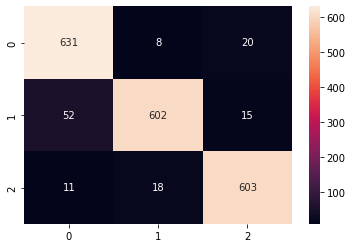

In [100]:
sns.heatmap(data=cm,fmt='d',annot=True)

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       659
           1       0.96      0.90      0.93       669
           2       0.95      0.95      0.95       632

    accuracy                           0.94      1960
   macro avg       0.94      0.94      0.94      1960
weighted avg       0.94      0.94      0.94      1960



In [102]:
def predict_emotion(ele):
    ele=[ele]
    input_tfidf=tdidf_Vectorizer.transform(ele)
    predicted_label=xgb_i.predict(input_tfidf)
    predicted_emotion=le.inverse_transform(predicted_label)
    return predicted_emotion

In [103]:
user_input=input("Enter a comment")


Enter a commentthis is a eye opening for all


In [104]:
emotion=predict_emotion(user_input)


In [105]:
print(emotion)

['anger']
